## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files

uploaded = files.upload()

Saving GSS.xlsx to GSS.xlsx


In [17]:
GSS_data = pd.read_excel('GSS.xlsx')
GSS_data.head()

,year,id_,hrs2,sphrs2,hompop,eqwlth,happy,hapmar,satjob,satfin
0,1972,1,.i: Inapplicable,.i: Inapplicable,1,.i: Inapplicable,Not too happy,.i: Inapplicable,A little dissatisfied,Not satisfied at all
1,1972,2,.i: Inapplicable,.i: Inapplicable,2,.i: Inapplicable,Not too happy,.i: Inapplicable,.i: Inapplicable,More or less satisfied
2,1972,3,.i: Inapplicable,.i: Inapplicable,4,.i: Inapplicable,Pretty happy,.i: Inapplicable,Moderately satisfied,Pretty well satisfied
3,1972,4,.i: Inapplicable,.i: Inapplicable,2,.i: Inapplicable,Not too happy,.i: Inapplicable,Very satisfied,Not satisfied at all
4,1972,5,.i: Inapplicable,.i: Inapplicable,2,.i: Inapplicable,Pretty happy,.i: Inapplicable,.i: Inapplicable,Pretty well satisfied


In [18]:
GSS_data = GSS_data.rename(columns={'hrs2' : 'hrs_weekly', 'sphrs2' : 'spouse_weekly'})

I selected variable categories from my data focused on people's work life and marriage and family life to attempt to see if there is any correlation. The weekly hours variables for both the individual and their spouse were selected to attempt to get a picture of how much work consumes a person's time. The happiness, marriage happiness, job satisfaction, and financial satisfaction were selected to try and see if there was any potential correlation between any of those four variables and the amount of hours work. The equal wealth variable is a response to if the individual believes the government should reduce income differences. Typically equal wealth opinions are seen as being tied to a person's financial situation so there is potential for correlation there. Additionally, I tried to select variables that appear to have been consistently recorded over many years to avoid too narrow of a final data set to work with. Overall, my variables were chosen as they are all items or traits that are typically viewed as interconnected in some way so I am curious if the data will show any interconnection or correlation.

In [19]:
GSS_data.info()
#first I am trying to figure out if the columns I would atticipate being integers (hrs_weekly, spouse_weekly) are actually recorded as integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           72390 non-null  int64 
 1   id_            72390 non-null  int64 
 2   hrs_weekly     72390 non-null  object
 3   spouse_weekly  72390 non-null  object
 4   hompop         72390 non-null  object
 5   eqwlth         72390 non-null  object
 6   happy          72390 non-null  object
 7   hapmar         72390 non-null  object
 8   satjob         72390 non-null  object
 9   satfin         72390 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.5+ MB


In [20]:
#I don't like how much data this is because the codebooks are by year, so I'm going to limit it to 2022
GSS_data = GSS_data[GSS_data['year'] == 2022]

In [21]:
GSS_data.info() #this seems a lot more managble, plus only one codebook to consult (yay!)

<class 'pandas.core.frame.DataFrame'>
Index: 3544 entries, 68846 to 72389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3544 non-null   int64 
 1   id_            3544 non-null   int64 
 2   hrs_weekly     3544 non-null   object
 3   spouse_weekly  3544 non-null   object
 4   hompop         3544 non-null   object
 5   eqwlth         3544 non-null   object
 6   happy          3544 non-null   object
 7   hapmar         3544 non-null   object
 8   satjob         3544 non-null   object
 9   satfin         3544 non-null   object
dtypes: int64(2), object(8)
memory usage: 304.6+ KB


In [22]:
GSS_data['hrs_weekly'].unique() #attempting to find the issues that are preventing the column from being an integer

array(['.i:  Inapplicable', '25', '50', '40', '36', '30', '35', '60',
       '.s:  Skipped on Web', '46', '.n:  No answer', '80',
       '.d:  Do not Know/Cannot Choose', '55', '48', '38', '45', '24',
       '10', '32', '1', '66', '21', '52', '6', '20', '70'], dtype=object)

In [30]:
GSS_data['hrs_weekly'].replace('.i:  Inapplicable', 0, inplace=True)
GSS_data['hrs_weekly'].replace('.n:  No answer', np.nan, inplace=True)
GSS_data['hrs_weekly'].replace('.s:  Skipped on Web', np.nan, inplace=True)
GSS_data['hrs_weekly'].replace('.d:  Do not Know/Cannot Choose', np.nan, inplace=True)
#replacing all no answer or skipped or didn't know with nan and the inapplicable with 0

In [38]:
#now i'm going to drop the nans so i can make it in integer column
GSS_data.dropna(subset=['hrs_weekly'], inplace=True)

GSS_data['hrs_weekly'] = GSS_data['hrs_weekly'].astype(int)

In [39]:
#now to basically do the same thing for the spouse weekly hours work
GSS_data['spouse_weekly'].unique()

array(['.i:  Inapplicable', '45', '40', '.n:  No answer', '46',
       '.s:  Skipped on Web', '30', '35', '52', '60', '32', '84'],
      dtype=object)

In [40]:
GSS_data['spouse_weekly'].replace('.i:  Inapplicable', 0, inplace=True)
GSS_data['spouse_weekly'].replace('.n:  No answer', np.nan, inplace=True)
GSS_data['spouse_weekly'].replace('.s:  Skipped on Web', np.nan, inplace=True)

GSS_data.dropna(subset=['spouse_weekly'], inplace=True)

GSS_data['spouse_weekly'] = GSS_data['spouse_weekly'].astype(int)

<ipython-input-40-b170d68c4435>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  GSS_data['spouse_weekly'].replace('.i:  Inapplicable', 0, inplace=True)
<ipython-input-40-b170d68c4435>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [43]:
#checking on how many data entries I still have
GSS_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3521 entries, 68846 to 72389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3521 non-null   int64 
 1   id_            3521 non-null   int64 
 2   hrs_weekly     3521 non-null   int64 
 3   spouse_weekly  3521 non-null   int64 
 4   hompop         3521 non-null   object
 5   eqwlth         3521 non-null   object
 6   happy          3521 non-null   object
 7   hapmar         3521 non-null   object
 8   satjob         3521 non-null   object
 9   satfin         3521 non-null   object
dtypes: int64(4), object(6)
memory usage: 302.6+ KB


In [47]:
GSS_data['hompop'].unique()

array(['1', '2', '-100', '3', '6', '4', '5', '7', '9', '8', '12'],
      dtype=object)

In [51]:
#the -100 is a probably the error code when it is not applicable, so we're going to delete those entries
GSS_data.drop(GSS_data[GSS_data['hompop'] == '-100'].index, inplace=True)

#making it integer
GSS_data['hompop'] = GSS_data['hompop'].astype(int)

In [54]:
GSS_data['eqwlth'].unique()

array(['The government should reduce income differences',
       '.i:  Inapplicable', '2', '4', '3', '5', '6',
       'The government should not concern itself with reducing income differences',
       '.d:  Do not Know/Cannot Choose', '.n:  No answer',
       '.s:  Skipped on Web'], dtype=object)

In [57]:
#eqwlth is supposed to be a numberic code based on levels 1-7 with one being should reduce and 7 being shouldn't concern itself
#im going to make all the don't know, no answer, or not applicable with 0s
GSS_data['eqwlth'].replace('.n:  No answer', 0, inplace=True)
GSS_data['eqwlth'].replace('.s:  Skipped on Web', 0, inplace=True)
GSS_data['eqwlth'].replace('.d:  Do not Know/Cannot Choose', 0, inplace=True)
GSS_data['eqwlth'].replace('.i:  Inapplicable', 0, inplace=True)
GSS_data['eqwlth'].replace('The government should reduce income differences', 1, inplace=True)
GSS_data['eqwlth'].replace('The government should not concern itself with reducing income differences', 7, inplace=True)

GSS_data['eqwlth'] = GSS_data['eqwlth'].astype(int)

<ipython-input-57-ea6b996f534b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  GSS_data['eqwlth'].replace('.n:  No answer', 0, inplace=True)
<ipython-input-57-ea6b996f534b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [59]:
GSS_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 68846 to 72388
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           1766 non-null   int64 
 1   id_            1766 non-null   int64 
 2   hrs_weekly     1766 non-null   int64 
 3   spouse_weekly  1766 non-null   int64 
 4   hompop         1766 non-null   int64 
 5   eqwlth         1766 non-null   int64 
 6   happy          1766 non-null   object
 7   hapmar         1766 non-null   object
 8   satjob         1766 non-null   object
 9   satfin         1766 non-null   object
dtypes: int64(6), object(4)
memory usage: 151.8+ KB


In [60]:
#going to check the other variables if there's any odd entries or something
print(GSS_data['happy'].unique())
print(GSS_data['hapmar'].unique())
print(GSS_data['satjob'].unique())
print(GSS_data['satfin'].unique())

['Not too happy' 'Pretty happy' 'Very happy'
 '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web' '.n:  No answer']
['.i:  Inapplicable' 'PRETTY HAPPY' 'VERY HAPPY' 'NOT TOO HAPPY'
 '.n:  No answer' '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose']
['A little dissatisfied' '.i:  Inapplicable' 'Moderately satisfied'
 'Very satisfied' '.s:  Skipped on Web' 'Very dissatisfied'
 '.d:  Do not Know/Cannot Choose' '.n:  No answer']
['Not satisfied at all' 'More or less satisfied' 'Pretty well satisfied'
 '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web' '.n:  No answer']


In [61]:
GSS_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 68846 to 72388
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           1766 non-null   int64 
 1   id_            1766 non-null   int64 
 2   hrs_weekly     1766 non-null   int64 
 3   spouse_weekly  1766 non-null   int64 
 4   hompop         1766 non-null   int64 
 5   eqwlth         1766 non-null   int64 
 6   happy          1766 non-null   object
 7   hapmar         1766 non-null   object
 8   satjob         1766 non-null   object
 9   satfin         1766 non-null   object
dtypes: int64(6), object(4)
memory usage: 151.8+ KB


In [62]:
GSS_data.head()

,year,id_,hrs_weekly,spouse_weekly,hompop,eqwlth,happy,hapmar,satjob,satfin
68846,2022,1,0,0,1,1,Not too happy,.i: Inapplicable,A little dissatisfied,Not satisfied at all
68847,2022,2,0,0,2,0,Not too happy,PRETTY HAPPY,.i: Inapplicable,More or less satisfied
68849,2022,4,25,0,3,0,Not too happy,.i: Inapplicable,A little dissatisfied,Pretty well satisfied
68851,2022,6,0,0,2,1,Pretty happy,.i: Inapplicable,Moderately satisfied,More or less satisfied
68858,2022,13,0,0,6,2,Very happy,VERY HAPPY,Very satisfied,More or less satisfied


3.

In [78]:
GSS_data.describe()

,year,id_,hrs_weekly,spouse_weekly,hompop,eqwlth
count,1766.0,1766.000000,1766.00000,1766.000000,1766.000000,1766.000000
mean,2022.0,1757.741789,0.85957,0.210646,2.319932,2.211212
std,0.0,1015.530639,5.96492,3.182427,1.429404,2.352772
min,2022.0,1.000000,0.00000,0.000000,1.000000,0.000000
25%,2022.0,881.250000,0.00000,0.000000,1.000000,0.000000
50%,2022.0,1757.000000,0.00000,0.000000,2.000000,1.000000
75%,2022.0,2640.500000,0.00000,0.000000,3.000000,4.000000
max,2022.0,3544.000000,66.00000,60.000000,12.000000,7.000000


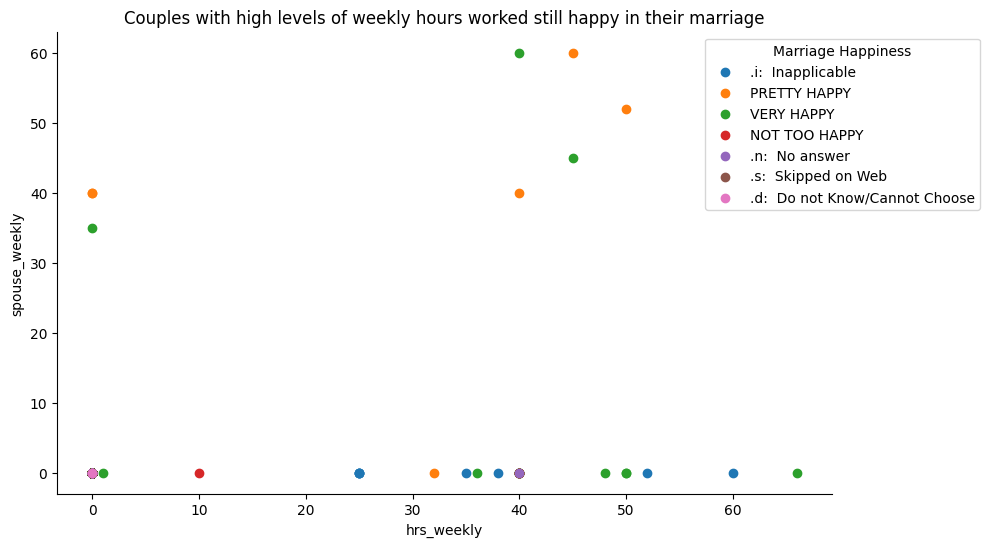

In [79]:
plt.figure(figsize=(10,6))

for category in GSS_data['hapmar'].unique():
    subset = GSS_data[GSS_data['hapmar'] == category]
    plt.scatter(subset['hrs_weekly'], subset['spouse_weekly'], label=category)

plt.xlabel('hrs_weekly')
plt.ylabel('spouse_weekly')

plt.legend(title = 'Marriage Happiness', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Couples with high levels of weekly hours worked still happy in their marriage')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

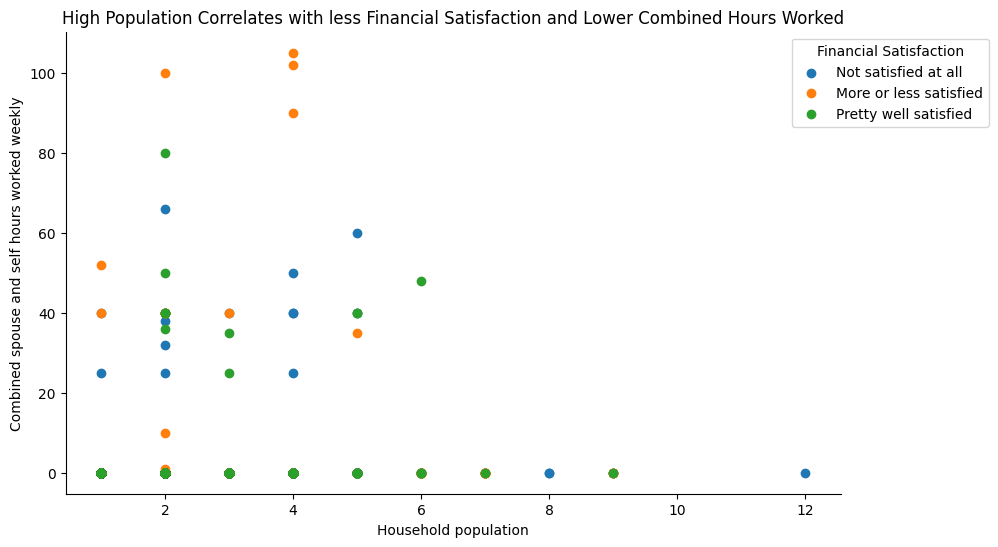

In [85]:
GSS_data['total_hours'] = GSS_data['hrs_weekly'] + GSS_data['spouse_weekly']
#GSS_data['finsat'] = GSS_data.drop(GSS_data[GSS_data['satfin'] == '.d:  Do not Know/Cannot Choose'].index, inplace=True)
#GSS_data['finsat'] = GSS_data.drop(GSS_data[GSS_data['satfin'] == '.s:  Skipped on Web'].index, inplace=True)
#GSS_data['finsat'] = GSS_data.drop(GSS_data[GSS_data['satfin'] == '.n:  No answer'].index, inplace=True)

# im honestly not really sure how I ended up with the satfin category being the one that the indecisive people were dropped from, but it works for my purposes
plt.figure(figsize=(10,6))

for category in GSS_data['satfin'].unique():
    subset = GSS_data[GSS_data['satfin'] == category]
    plt.scatter(subset['hompop'], subset['total_hours'], label=category)

plt.xlabel('Household population')
plt.ylabel('Combined spouse and self hours worked weekly')

plt.legend(title = 'Financial Satisfaction', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('High Population Correlates with less Financial Satisfaction and Lower Combined Hours Worked')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

Honestly this data was both suprising and exactly what I thought it was going to represent in different ways. Starting with what I expected, when household population size and the combined hours worked of both the individual and spouse were charted, not only did financial satisifaction drop down as household population grew but so did combined hours. This could of course be due to a number of factors, but it is worth considering the potential impact that people with higher household population can tend to live a lifestyle of a stay at home parent with a number of children. This might potentially shed some insight into why the shared hourse worked dropped as household population increased. Additionally financial satisifaction dropping is extremely predictable, as the larger the household the more expensive it it for the household to feel financialy secure.

What surprised me about this data set was the marriage happiness levels when labeled by the number of hours worked by the individual and by the spouse. The assumption could be that the more both people in the relationship work, the lower the marriage happiness, even simply due to the lack of time together. However in this data set, the households where both the individual and their spouse worked high hours also recorded pretty or very happy with their marriage. Of course there is always the chance that the reports are not honestly because not everyone is always willing to say if they are not that happy in their marriage. Additionally a number of the respondents chose to not answer the question of marriage happiness level, which could potentially support the lack of willingness to admit less than happiness theory.